<a href="https://colab.research.google.com/github/Ashika-08/Coders-Cave-Internship/blob/main/climate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d die9origephit/temperature-data-albany-new-york

  0% 0.00/1.37M [00:00<?, ?B/s]
100% 1.37M/1.37M [00:00<00:00, 123MB/s]


In [ ]:
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
zip_file_path ="/content/temperature-data-albany-new-york.zip"
dataframes = []


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file_name in zip_ref.namelist():
        with zip_ref.open(file_name) as file:
            df = pd.read_csv(file)
            dataframes.append(df)


for i, df in enumerate(dataframes):
    print(f"Data from {zip_ref.namelist()[i]}:")
    print(df.head())
    print("\n")

Data from daily_data.csv:
       STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0  72518014735  2015-01-01T23:59:00       SOD         6         PRECIP   
1  72518014735  2015-01-02T23:59:00       SOD         6         PRECIP   
2  72518014735  2015-01-03T23:59:00       SOD         6         PRECIP   
3  72518014735  2015-01-04T23:59:00       SOD         6         PRECIP   
4  72518014735  2015-01-05T23:59:00       SOD         6         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ...  DailyPeakWindDirection  DailyPeakWindSpeed  \
0  NWS ALBANY, NY  ...          

<ipython-input-13-708f909a1ffc>:8: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


Analysis for daily_data.csv:
Summary Statistics:
            STATION  SOURCE  BackupElevation  BackupLatitude  BackupLongitude  \
count  2.668000e+03  2668.0           2668.0     2668.000000      2668.000000   
mean   7.251801e+10     6.0            260.0       42.689750       -73.828268   
std    0.000000e+00     0.0              0.0        0.004187         0.005764   
min    7.251801e+10     6.0            260.0       42.681200       -73.831090   
25%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
50%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
75%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
max    7.251801e+10     6.0            260.0       42.691800       -73.816500   

       DailyAverageDewPointTemperature  DailyAverageDryBulbTemperature  \
count                      2668.000000                     2668.000000   
mean                         38.217766                       50.107571   

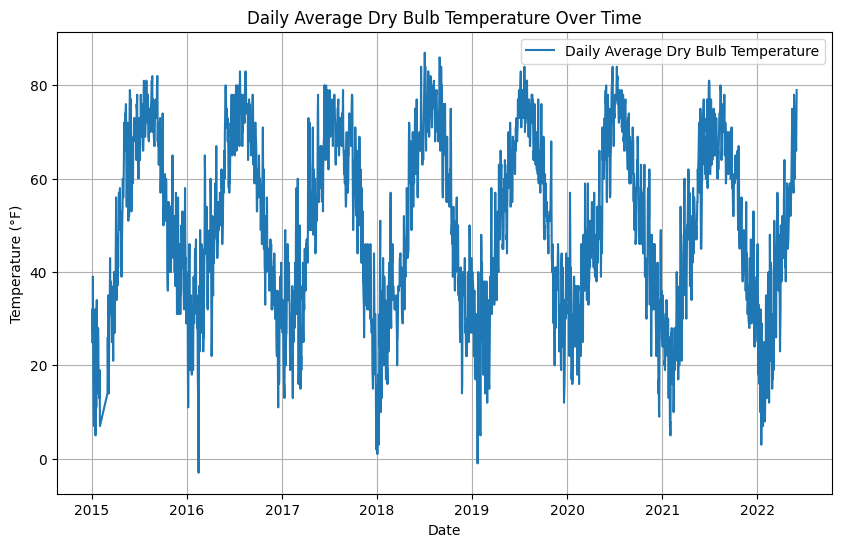

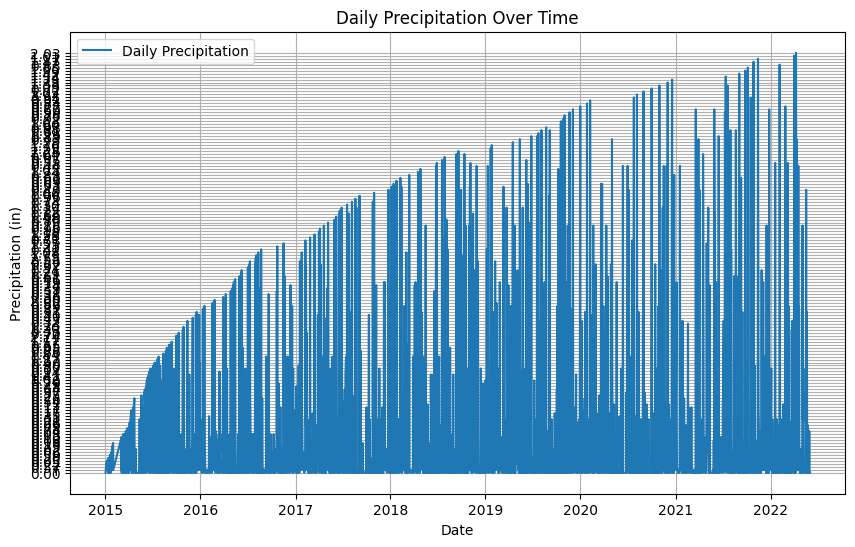

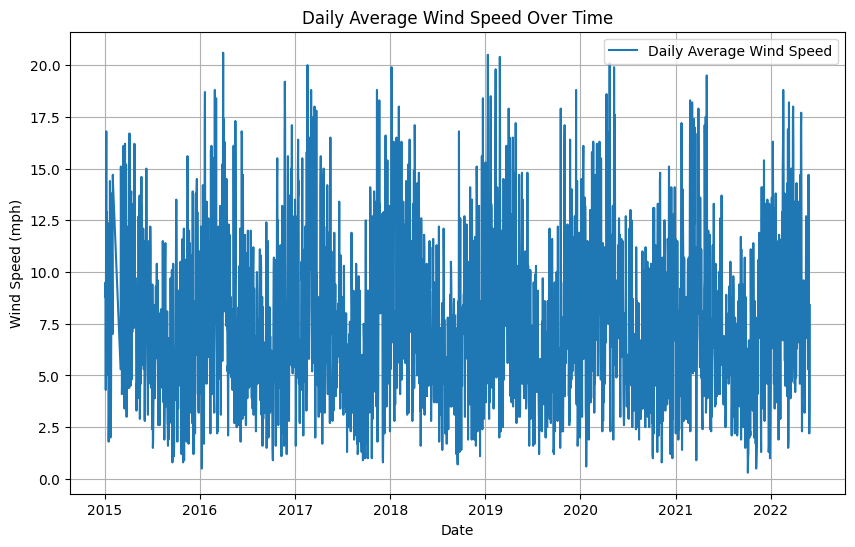



Analysis for hourly_data.csv:
Summary Statistics:
            STATION        SOURCE  BackupElevation  BackupLatitude  \
count  6.472900e+04  64729.000000          64729.0    64729.000000   
mean   7.251801e+10      6.994207            260.0       42.689775   
std    0.000000e+00      0.075894              0.0        0.004167   
min    7.251801e+10      6.000000            260.0       42.681200   
25%    7.251801e+10      7.000000            260.0       42.691800   
50%    7.251801e+10      7.000000            260.0       42.691800   
75%    7.251801e+10      7.000000            260.0       42.691800   
max    7.251801e+10      7.000000            260.0       42.691800   

       BackupLongitude  HourlyRelativeHumidity  HourlyVisibility  \
count     64729.000000            64729.000000      64729.000000   
mean        -73.828303               66.361538          9.315017   
std           0.005736               18.376979          2.128327   
min         -73.831090                8.00000

In [ ]:
for i, df in enumerate(dataframes):
    print(f"Analysis for {zip_ref.namelist()[i]}:")
    print("Summary Statistics:")
    print(df.describe())
    print("\n")

    # Visualize key variables
    if 'DATE' in df.columns:
        # Convert DATE column to datetime if available
        df['DATE'] = pd.to_datetime(df['DATE'])

        # Plot some key variables over time if available
        if 'DailyAverageDryBulbTemperature' in df.columns:
            plt.figure(figsize=(10, 6))
            plt.plot(df['DATE'], df['DailyAverageDryBulbTemperature'], label='Daily Average Dry Bulb Temperature')
            plt.xlabel('Date')
            plt.ylabel('Temperature (°F)')
            plt.title('Daily Average Dry Bulb Temperature Over Time')
            plt.legend()
            plt.grid(True)
            plt.show()

        if 'DailyPrecipitation' in df.columns:
            plt.figure(figsize=(10, 6))
            plt.plot(df['DATE'], df['DailyPrecipitation'], label='Daily Precipitation')
            plt.xlabel('Date')
            plt.ylabel('Precipitation (in)')
            plt.title('Daily Precipitation Over Time')
            plt.legend()
            plt.grid(True)
            plt.show()

        if 'DailyAverageWindSpeed' in df.columns:
            plt.figure(figsize=(10, 6))
            plt.plot(df['DATE'], df['DailyAverageWindSpeed'], label='Daily Average Wind Speed')
            plt.xlabel('Date')
            plt.ylabel('Wind Speed (mph)')
            plt.title('Daily Average Wind Speed Over Time')
            plt.legend()
            plt.grid(True)
            plt.show()
    print("\n")

Analysis for daily_data.csv:
Exploratory Data Analysis (EDA):
Data Distribution:
            STATION  SOURCE  BackupElevation  BackupLatitude  BackupLongitude  \
count  2.668000e+03  2668.0           2668.0     2668.000000      2668.000000   
mean   7.251801e+10     6.0            260.0       42.689750       -73.828268   
std    0.000000e+00     0.0              0.0        0.004187         0.005764   
min    7.251801e+10     6.0            260.0       42.681200       -73.831090   
25%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
50%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
75%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
max    7.251801e+10     6.0            260.0       42.691800       -73.816500   

       DailyAverageDewPointTemperature  DailyAverageDryBulbTemperature  \
count                      2668.000000                     2668.000000   
mean                         38.217766   

<ipython-input-25-d41f020d06ae>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


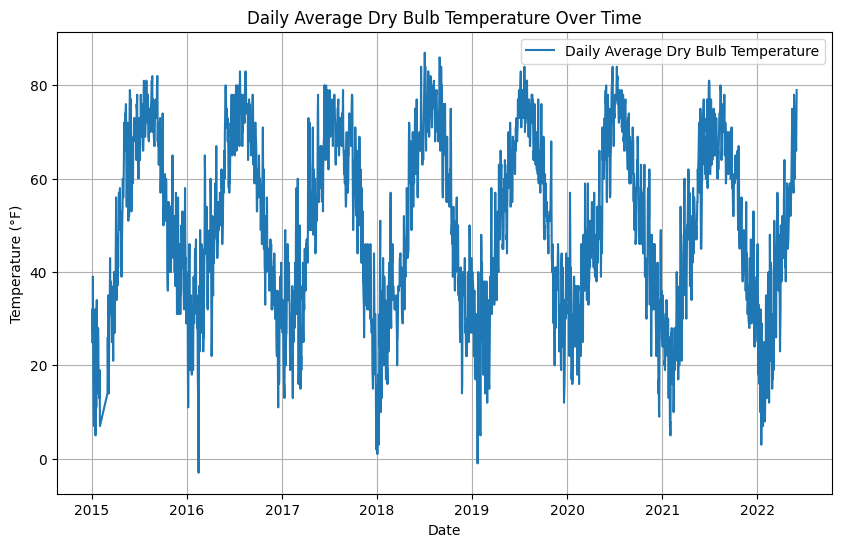

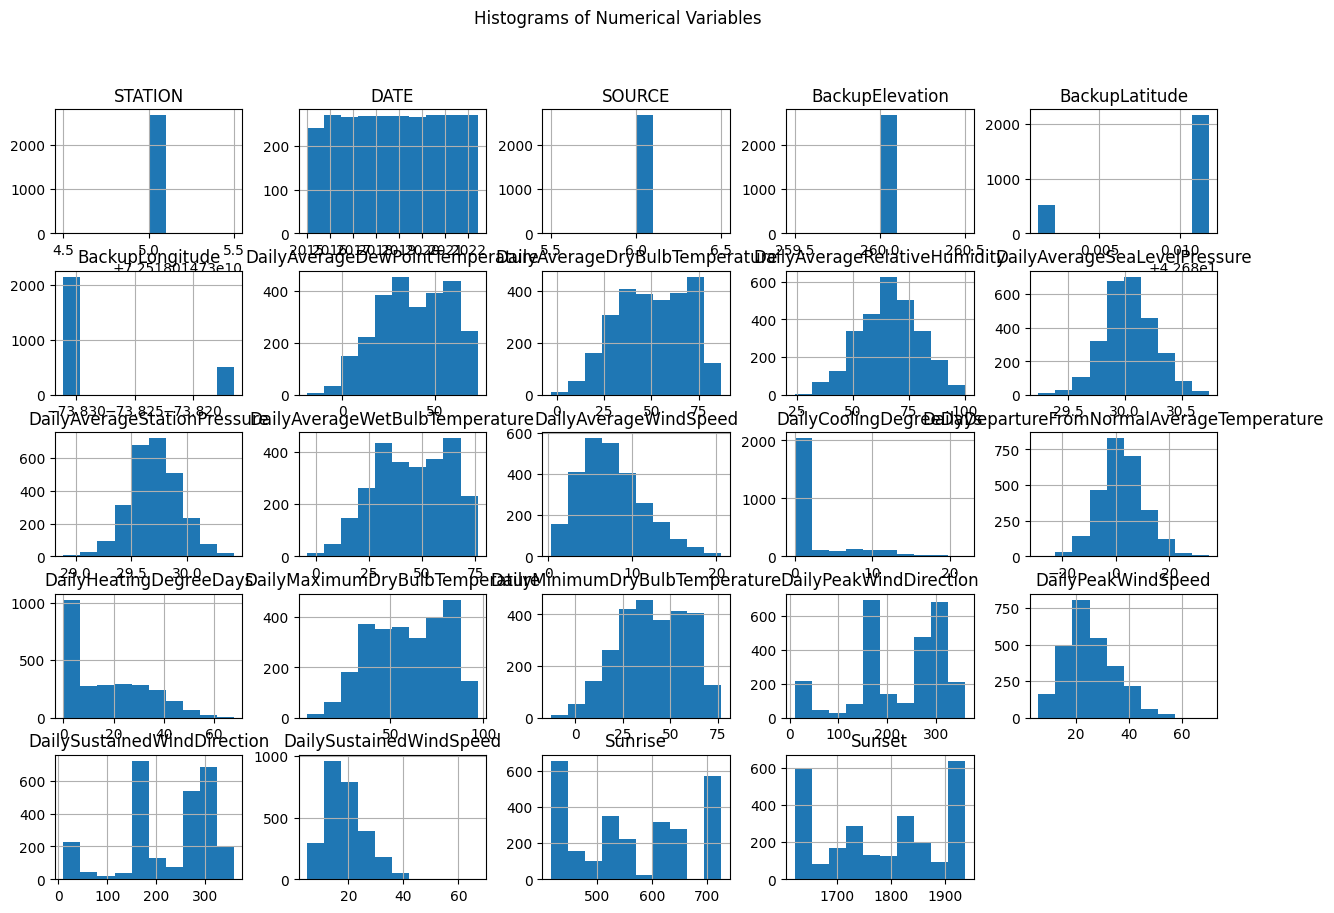

<ipython-input-25-d41f020d06ae>:42: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


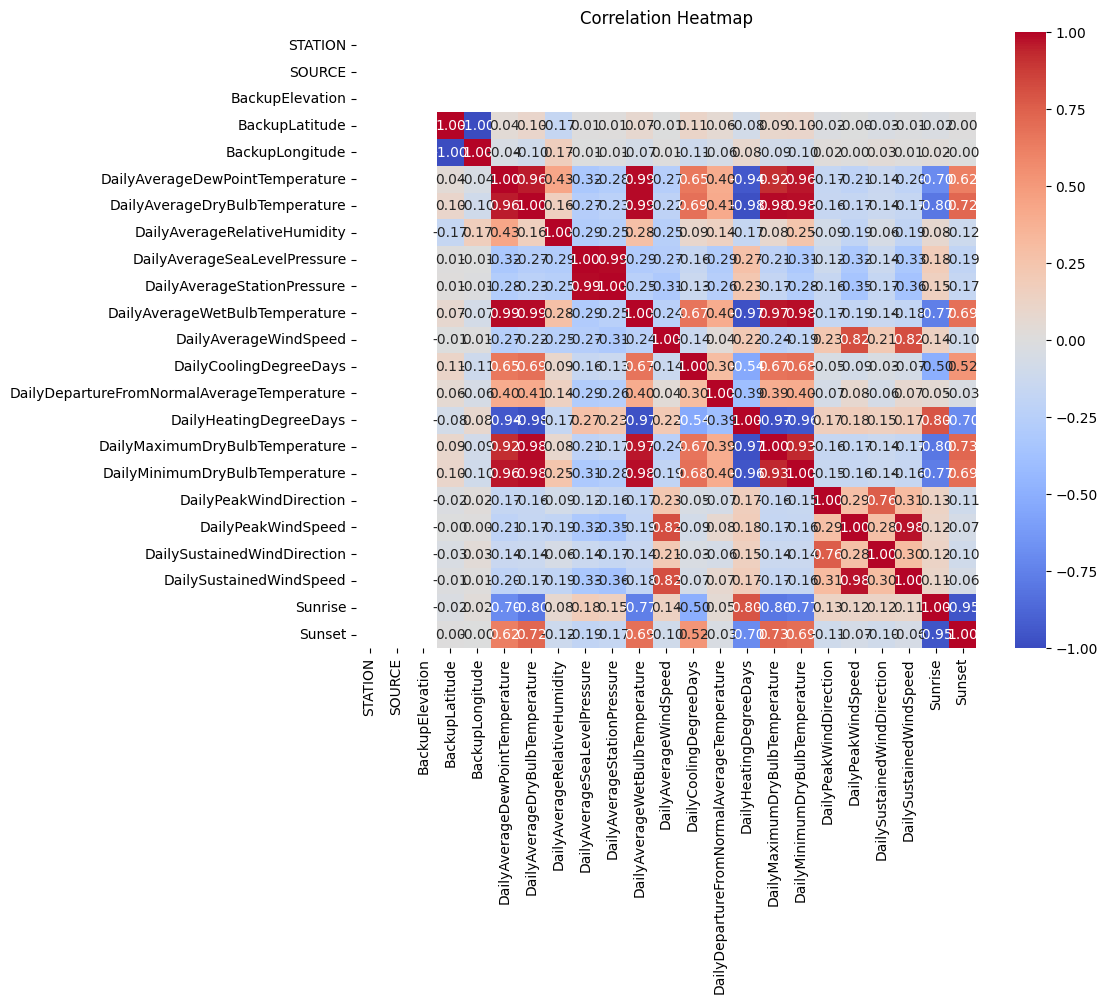



Analysis for hourly_data.csv:
Exploratory Data Analysis (EDA):


Analysis for monthly_data.csv:
Exploratory Data Analysis (EDA):


Analysis for three_hour_data.csv:
Exploratory Data Analysis (EDA):




In [ ]:
for i, df in enumerate(dataframes):
    print(f"Analysis for {zip_ref.namelist()[i]}:")
    print("Exploratory Data Analysis (EDA):")
    if 'DATE' in df.columns and 'DailyAverageDryBulbTemperature' in df.columns:
        print("Data Distribution:")
        print(df.describe())
        print("\n")

        # Check for missing values
        print("Missing Values:")
        print(df.isnull().sum())
        print("\n")

        # Correlation analysis
        print("Correlation Matrix:")
        print(df.corr())
        print("\n")

        # Statistical Analysis
        print("Statistical Analysis:")
        # You can perform hypothesis testing or additional statistical analysis here if applicable

        # Visualization
        print("Visualization:")
        # Plot time series data if available
        plt.figure(figsize=(10, 6))
        plt.plot(df['DATE'], df['DailyAverageDryBulbTemperature'], label='Daily Average Dry Bulb Temperature')
        plt.xlabel('Date')
        plt.ylabel('Temperature (°F)')
        plt.title('Daily Average Dry Bulb Temperature Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Visualize data distribution using histograms
        df.hist(figsize=(15, 10))
        plt.suptitle('Histograms of Numerical Variables')
        plt.show()

        # Create correlation heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap')
        plt.show()
    # else:
    #     print("DATE or DailyAverageDryBulbTemperature columns not found in the DataFrame.")
    print("\n")